## Bitwise Operations

Bitwise with images (AND, OR, XOR, NOT) applying to images (ROIs...)



In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

* We use 2 images, and resize to the same resolution **height, width**

In [2]:
import cv2
import numpy as np

height = 1024
width = 1024

img1 = cv2.imread('../images/Lena.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_clone = cv2.resize(img1, (height,width), cv2.INTER_CUBIC)

img2 = cv2.imread('../images/OpenCV_Logo.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_clone = cv2.resize(img2, (height,width), cv2.INTER_CUBIC)


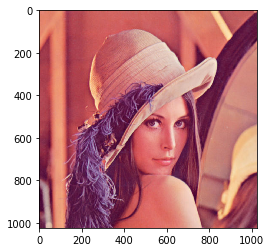

In [3]:
# Show images
plt.imshow(img1_clone)

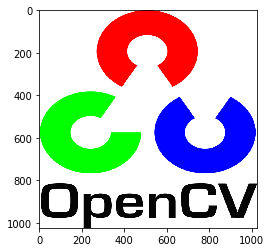

In [4]:
# Show images
plt.imshow(img2_clone)

### Using bitwise
* Using bitwise operation to **combine images (OR)** or **filter images (AND)**

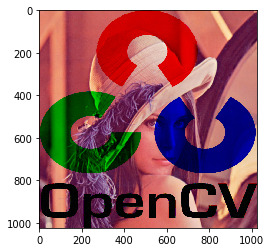

In [5]:
# Bitwise AND
bitwise_and = cv2.bitwise_and(img1_clone, img2_clone)
plt.imshow(bitwise_and)

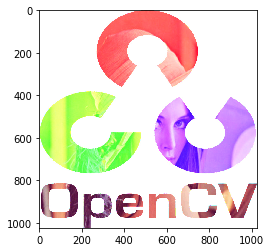

In [6]:
# Bitwise OR
bitwise_or = cv2.bitwise_or(img1_clone, img2_clone)
plt.imshow(bitwise_or)

### Applying ROI
* For how to use basic figures (points, lines, poligonal curves,...) in OpenCV check ```cv2.line()```, ```cv2.rectangle()```, ```cv2.circle()```, ```cv2.clipLine()```, ```cv2.arrowedLine()```, ```cv2.polylines()```, ```cv2.fillPoly()``` functions.
* More information is avaliable in [OpenCV documentation](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html)

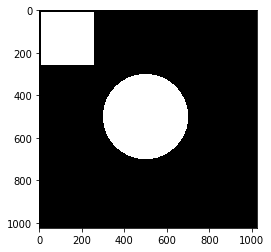

In [7]:
# Create ROI 
roi_2D = np.zeros((height, width), dtype="uint8")
cv2.rectangle(roi_2D, (10, 10), (256, 256), (255, 255, 255), -1)
cv2.circle(roi_2D, (500, 500), 200, (255, 255, 255), -1)

roi = np.stack((roi_2D,)*3, axis=-1)

plt.imshow(roi)

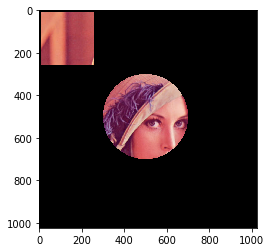

In [8]:
# Applied ROI
bitwise_and = cv2.bitwise_and(img1_clone, roi)
plt.imshow(bitwise_and)

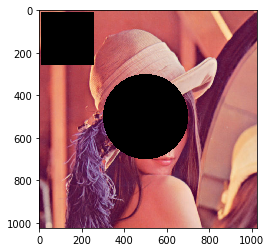

In [9]:
bitwise_and = cv2.bitwise_and(img1_clone, cv2.bitwise_not(roi))
plt.imshow(bitwise_and)

### Create a polygone
* ```polylines``` creates a line from points (described as coordinates)
* ```fillPoly``` fill the area described by a list of points

In [11]:
import cv2
import numpy as np

img = cv2.imread('../images/Lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

roi_2D = np.zeros(img.shape, dtype="uint8") # Create an image of resolution

# List of points that represent a hexagone
pts = np.array([[[25, 70], [25, 160],  
                [110, 200], [200, 160],  
                [200, 70], [110, 20]]], 
               np.int32) 


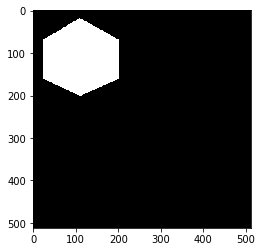

In [12]:
hexagon  = cv2.polylines(roi_2D, pts, isClosed=True, color = (255, 255, 255), thickness=2)
roi_2D = cv2.fillPoly(roi_2D, [pts], (255, 255, 255))

plt.imshow(hexagon)

## Assignment 1
* Detecting lane lines on a binary mask
   * Create a masks to be applied e.g. ROI (trapezoid) to lane detection
   
![image](../images/lanes_road.jpg)

## Extract an object from color range
* With the function ```inRange```, it is easy to detect an object based on the range of pixel values in the HSV colorspace

* In this example we are going to extract the **orange rectange** of the following figure

NOTE: we are using another image space color known as HSV (for hue, saturation, value). More information related with HSV can be found in [Wikipedia](https://en.wikipedia.org/wiki/HSL_and_HSV)

<img src="../images/shapes.png" width=400 />

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('../images/shapes.png')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


plt.imshow(imgRGB) # Show original image

In [ ]:
lower_orange = np.array([5, 50, 50])
upper_orange = np.array([15, 255, 255])

mask_orange = cv2.inRange(imgHSV, lower_orange, upper_orange) #HSV format

plt.imshow(mask_orange, cmap='gray')

In [ ]:
## Applying the mask to the whole image
img_masked = imgRGB.copy()
img_masked[:,:,0] = cv2.bitwise_and(mask_orange, imgRGB[:,:,0])
img_masked[:,:,1] = cv2.bitwise_and(mask_orange, imgRGB[:,:,1])
img_masked[:,:,2] = cv2.bitwise_and(mask_orange, imgRGB[:,:,2])

plt.imshow(img_masked)

## Assignment 2
* Create a code that segmentated the ball of a video using ```cv2.inRange``` function
   
![image](../images/ball_example.png)

### Create a python script
Next cells create a file name **show_video.py** using the magic commands ```%%writefile```
* It is highly recommendable to run the script in the host to be able to create a "window" visible by means of ```python3 ./show_video.py```

In [1]:
%%writefile show_video.py

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import cv2
cap = cv2.VideoCapture('../videos/ball_example.mp4')
while(cap.isOpened()):
  ret, frame = cap.read()
  if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

cap.release()


Writing show_video.py
